In [271]:
#importing the libraries that we need to conduct a point pattern analysis
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from sodapy import Socrata

# new for data visualization
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

In [272]:
#importing the calenviroscreen data and checking for the census tract
ces = pd.read_csv('CES/ces3results.csv')
ces.sample()

,CensusTract,TotalPopulation,CaliforniaCounty,ZIP,NearbyCity_(to help approximate location only),Longitude,Latitude,CES3.0_Score,CES3.0_pctl,CES3.0_pctl_range,...,LinguisticIsolation_pctl,Poverty,Poverty_pctl,Unemployment,Unemployment_pctl,HousingBurden,HousingBurden_pctl,PopChar,PopChar_Score,PopChar_pctl
2588,6013313206,5757,Contra Costa,94565,Pittsburg,-121.899331,38.013919,34.4,67.36,65-70%,...,77.08,48.8,71.88,11.8,68.79,22.2,67.68,79.67,8.26,92.4


In [273]:
#adding a 0 in front of the census tract
ces = pd.read_csv(
    'CES/ces3results.csv',
    dtype=
    {
        'CensusTract':str,
    }
)
ces.sample()

,CensusTract,TotalPopulation,CaliforniaCounty,ZIP,NearbyCity_(to help approximate location only),Longitude,Latitude,CES3.0_Score,CES3.0_pctl,CES3.0_pctl_range,...,LinguisticIsolation_pctl,Poverty,Poverty_pctl,Unemployment,Unemployment_pctl,HousingBurden,HousingBurden_pctl,PopChar,PopChar_Score,PopChar_pctl
4658,06013302009,5641,Contra Costa,94531,Antioch,-121.747886,37.971513,21.17,41.25,40-45%,...,30.14,35.4,53.07,8.2,40.51,24.1,74.03,57.89,6.0,61.84


In [274]:
#looking at the columns to determine which ones we will keep
columns = list(ces)
columns

['CensusTract',
 'TotalPopulation',
 'CaliforniaCounty',
 'ZIP',
 'NearbyCity_(to help approximate location only)',
 'Longitude',
 'Latitude',
 'CES3.0_Score',
 'CES3.0_pctl',
 'CES3.0_pctl_range',
 'SB535_DisadvantagedCommunity',
 'Ozone',
 'Ozone_Pctl',
 'PM2.5',
 'PM2.5_Pctl',
 'DieselPM',
 'DieselPM_pctl',
 'DrinkingWater',
 'DrinkingWater_pctl',
 'Pesticides',
 'Pesticides_pctl',
 'ToxRelease',
 'ToxRelease_pctl',
 'Traffic',
 'Traffic_pctl',
 'CleanupSites',
 'CleanupSites_pctl',
 'Groundwater_Threats',
 'Groundwater_Threats_pctl',
 'HazWaste',
 'HazWaste_pctl',
 'ImpWater_Bodies',
 'ImpWater_Bodies_pctl',
 'SolidWaste',
 'SolidWaste_pctl',
 'PollutionBurden',
 'PollutionBurden_Score',
 'PollutionBurden_pctl',
 'Asthma',
 'Asthma_pctl',
 'LBW',
 'LBW_pctl',
 'CVD',
 'CVD_pctl',
 'Education',
 'Education_pctl',
 'LinguisticIsolation',
 'LinguisticIsolation_pctl',
 'Poverty',
 'Poverty_pctl',
 'Unemployment',
 'Unemployment_pctl',
 'HousingBurden',
 'HousingBurden_pctl',
 'PopChar'

In [275]:
#trimming our data and renaming the columns
ces = ces[['CensusTract','Longitude','Latitude','Asthma']]
ces.columns = ['censustract','longitude','latitude','asthma']
ces.sample()

,censustract,longitude,latitude,asthma
1106,06029005003,-119.232468,35.743634,53.43


In [276]:
#adding a census dataset to add neighborhood names
census = pd.read_csv('Censust_neighborhood.csv')
census.sample()

,GEOID,Tract,CensusTract,Tract Number,Neighborhood,Location,Latitude,Longitude
902,1400000US06037272301,"Census Tract 2723.01, Los Angeles County, Cali...",6037272301,272301,Mar Vista,"(34.0044305, -118.4228455)",34.00443,-118.422846


In [277]:
#adding 0 to census tracts so we can merge
census = pd.read_csv(
    'Censust_neighborhood.csv',
    dtype=
    {
        'CensusTract':str,
    }
)
census.sample()

,GEOID,Tract,CensusTract,Tract Number,Neighborhood,Location,Latitude,Longitude
1132,1400000US06037403321,"Census Tract 4033.21, Los Angeles County, Cali...",06037403321,403321,Diamond Bar,"(34.0161265, -117.7892785)",34.016126,-117.789278


In [278]:
#trimming the data
census = census[['GEOID','Tract','CensusTract','Neighborhood','Location',]]
census.columns = ['geoid','tract','censustract','neighborhood','location',]
census.sample()

,geoid,tract,censustract,neighborhood,location
2160,1400000US06037800406,"Census Tract 8004.06, Los Angeles County, Cali...",06037800406,Unincorporated Santa Monica Mountains,"(34.065344, -118.8552812)"


In [279]:
#merging the census data with the calenviroscreen dataset
#after checking the data, we notice there is a "neighborhood" that isnt part of the city of LA, so we will add another dataset
PM = census.merge(ces,on="censustract")
PM.sample()

,geoid,tract,censustract,neighborhood,location,longitude,latitude,asthma
610,1400000US06037212701,"Census Tract 2127.01, Los Angeles County, Cali...",06037212701,Koreatown,"(34.0546775, -118.3194445)",-118.319314,34.054304,47.36


In [280]:
#adding another census dataset to get just the census tracts for city of LA
census2 = pd.read_csv('Census_Tracts_2010_Population.csv')
census2.sample()

,OBJECTID,Tract,TRACTCE10,POP,LATPOP_D,WHIPOP_D,BLAPOP_D,AMIPOP_D,ASIPOP_D,HPIPOP_D,...,AMIVAP_D,ASIVAP_D,HPIVAP_D,OTHVAP_D,MMRVAP_D,H0010001,H0010002,H0010003,TOOLTIP,NLA_URL
920,921,6037275500,275500,5207,3698,676,330,13,419,26,...,11,369,26,12,19,1688,1643,45,Tract: 2755.00\nTotal Population: 5207,navigatela/reports/census_tracts_2010.cfm?PK=2...


In [281]:
#adding 0 to census tract
census2 = pd.read_csv(
    'Census_Tracts_2010_Population.csv',
    dtype=
    {
        'Tract':str,
    }
)
census2.sample()

,OBJECTID,Tract,TRACTCE10,POP,LATPOP_D,WHIPOP_D,BLAPOP_D,AMIPOP_D,ASIPOP_D,HPIPOP_D,...,AMIVAP_D,ASIVAP_D,HPIVAP_D,OTHVAP_D,MMRVAP_D,H0010001,H0010002,H0010003,TOOLTIP,NLA_URL
701,702,06037226002,226002,1604,799,364,294,9,123,1,...,9,115,1,3,10,1076,794,282,Tract: 2260.02\nTotal Population: 1604,navigatela/reports/census_tracts_2010.cfm?PK=2...


In [282]:
#trimming data
census2 = census2[['Tract','LATPOP_D','WHIPOP_D','BLAPOP_D','AMIPOP_D','ASIPOP_D','HPIPOP_D','OTHPOP_D']]
census2.columns = ['censustract','latinx','white','black','ami','asian','hpi','other']
census2.sample()

,censustract,latinx,white,black,ami,asian,hpi,other
197,06037124204,1963,712,151,10,199,12,12


In [283]:
#merging the datasets
PM25 = census2.merge(PM,on="censustract")
PM25.sample()

,censustract,latinx,white,black,ami,asian,hpi,other,geoid,tract,neighborhood,location,longitude,latitude,asthma
696,06037224410,1832,388,136,3,753,4,16,1400000US06037224410,"Census Tract 2244.10, Los Angeles County, Cali...",University Park,"(34.0343195, -118.2789565)",-118.279981,34.035139,54.5


In [284]:
#converting data to geodataframe
PM25 = gpd.GeoDataFrame(PM25,
                      crs="EPSG:4326", 
                      geometry=gpd.points_from_xy(PM25.longitude, PM25.latitude))

In [285]:
#converting longitude and latitude to floats
PM25.longitude = PM25.longitude.astype('float')
PM25.latitude = PM25.latitude.astype('float')

In [286]:
#dropping unmapped rows 
PM25.drop(PM25[PM25.longitude==0].index,inplace=True)

In [287]:
# project to web mercator
PM25=PM25.to_crs('EPSG:3857')

In [288]:
# drop rows with null values
PM25 = PM25.dropna()

In [289]:
#checking the size of our data
PM25.shape

(1010, 16)

In [290]:
#checking data to see if everything looks good and it does
PM25.sample(20)

,censustract,latinx,white,black,ami,asian,hpi,other,geoid,tract,neighborhood,location,longitude,latitude,asthma,geometry
724,06037229420,4134,14,549,6,3,1,13,1400000US06037229420,"Census Tract 2294.20, Los Angeles County, Cali...",South Park,"(33.9925325, -118.2608205)",-118.260818,33.992531,61.02,POINT (-13164734.007 4027799.179)
181,06037123420,2641,1521,94,10,340,2,23,1400000US06037123420,"Census Tract 1234.20, Los Angeles County, Cali...",Valley Glen,"(34.1939335, -118.418128)",-118.414672,34.193033,59.50,POINT (-13181860.967 4054751.186)
632,06037215101,349,1350,268,14,457,1,22,1400000US06037215101,"Census Tract 2151.01, Los Angeles County, Cali...",Mid-Wilshire,"(34.063565, -118.3542505)",-118.353553,34.063676,28.20,POINT (-13175057.242 4037355.392)
873,06037269500,158,3490,59,6,291,6,25,1400000US06037269500,"Census Tract 2695, Los Angeles County, California",Beverlywood,"(34.0419315, -118.3933555)",-118.393837,34.043409,27.03,POINT (-13179541.670 4034632.217)
419,06037190520,1408,1592,99,11,587,2,16,1400000US06037190520,"Census Tract 1905.20, Los Angeles County, Cali...",East Hollywood,"(34.0999325, -118.303805)",-118.303805,34.099933,51.93,POINT (-13169519.309 4042228.466)
39,06037106112,4092,1007,225,39,565,6,18,1400000US06037106112,"Census Tract 1061.12, Los Angeles County, Cali...",Sylmar,"(34.305005, -118.414298)",-118.412447,34.305478,63.87,POINT (-13181613.248 4069894.359)
78,06037111202,1421,2617,166,24,925,6,22,1400000US06037111202,"Census Tract 1112.02, Los Angeles County, Cali...",Granada Hills,"(34.2683485, -118.5151565)",-118.514827,34.268443,51.41,POINT (-13193010.204 4064904.598)
277,06037134303,1786,2146,188,27,865,12,8,1400000US06037134303,"Census Tract 1343.03, Los Angeles County, Cali...",West Hills,"(34.2027615, -118.614672)",-118.611899,34.203248,45.23,POINT (-13203816.199 4056126.026)
534,06037206200,661,414,878,20,1373,4,5,1400000US06037206200,"Census Tract 2062, Los Angeles County, California",Downtown,"(34.04707, -118.2428045)",-118.241598,34.046994,67.73,POINT (-13162594.458 4035113.919)
617,06037213310,2334,52,44,0,1019,13,4,1400000US06037213310,"Census Tract 2133.10, Los Angeles County, Cali...",Pico-Union,"(34.0508675, -118.29803)",-118.297892,34.050874,56.69,POINT (-13168861.044 4035635.249)


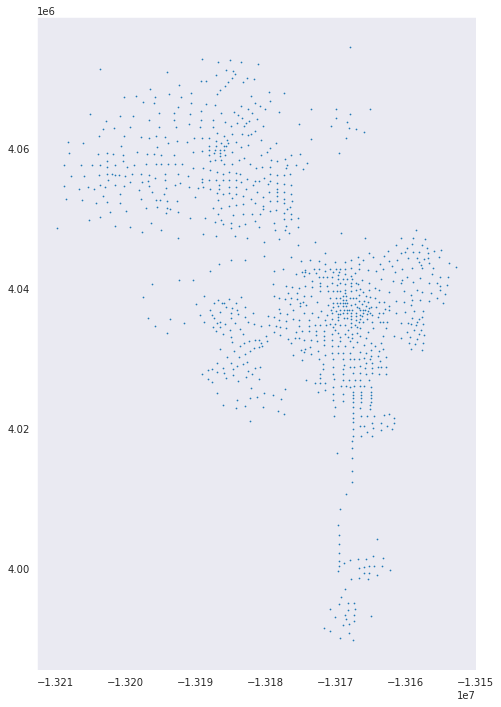

In [291]:
#plottig data
PM25.plot(figsize=(12,12),
             markersize=0.5)

In [292]:
# import that interact library
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

#importing the libraries that we need to conduct a point pattern analysis
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from sodapy import Socrata

# new for data visualization
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

In [307]:
top_asthma = PM25.asthma.value_counts().head(20).index.tolist()
top_asthma

[63.52,
 73.79,
 64.44,
 84.98,
 70.22,
 52.64,
 74.19,
 95.56,
 69.42,
 56.69,
 51.93,
 34.35,
 75.99,
 29.02,
 55.22,
 77.04,
 66.51,
 39.1,
 93.35,
 58.23]

In [308]:
#looking at our data of a particular neighborhood
PM25[PM25.neighborhood == 'Wilmington'].head()

,censustract,latinx,white,black,ami,asian,hpi,other,geoid,tract,neighborhood,location,longitude,latitude,asthma,geometry,x,y
950,06037294110,3571,267,53,8,137,89,3,1400000US06037294110,"Census Tract 2941.10, Los Angeles County, Cali...",Wilmington,"(33.797961, -118.2592835)",-118.260391,33.797993,53.39,POINT (-13164686.507 4001709.594),-1.316469e+07,4.001710e+06
951,06037294120,2173,33,129,4,10,8,2,1400000US06037294120,"Census Tract 2941.20, Los Angeles County, Cali...",Wilmington,"(33.795656, -118.2471535)",-118.247576,33.795780,70.22,POINT (-13163259.981 4001413.082),-1.316326e+07,4.001413e+06
952,06037294200,4344,320,49,21,143,38,26,1400000US06037294200,"Census Tract 2942, Los Angeles County, California",Wilmington,"(33.794846, -118.269301)",-118.269389,33.794838,66.68,POINT (-13165688.182 4001286.898),-1.316569e+07,4.001287e+06
953,06037294301,1999,219,37,6,145,35,4,1400000US06037294301,"Census Tract 2943.01, Los Angeles County, Cali...",Wilmington,"(33.794497, -118.2807785)",-118.279553,33.794662,63.92,POINT (-13166819.567 4001263.335),-1.316682e+07,4.001263e+06
954,06037294302,4178,287,92,15,134,35,3,1400000US06037294302,"Census Tract 2943.02, Los Angeles County, Cali...",Wilmington,"(33.7848645, -118.2793115)",-118.278290,33.784876,70.22,POINT (-13166679.037 3999952.630),-1.316668e+07,3.999953e+06


,censustract,latinx,white,black,ami,asian,hpi,other,geoid,tract,neighborhood,location,longitude,latitude,asthma,geometry,x,y
950,06037294110,3571,267,53,8,137,89,3,1400000US06037294110,"Census Tract 2941.10, Los Angeles County, Cali...",Wilmington,"(33.797961, -118.2592835)",-118.260391,33.797993,53.39,POINT (-13164686.507 4001709.594),-1.316469e+07,4.001710e+06
951,06037294120,2173,33,129,4,10,8,2,1400000US06037294120,"Census Tract 2941.20, Los Angeles County, Cali...",Wilmington,"(33.795656, -118.2471535)",-118.247576,33.795780,70.22,POINT (-13163259.981 4001413.082),-1.316326e+07,4.001413e+06
952,06037294200,4344,320,49,21,143,38,26,1400000US06037294200,"Census Tract 2942, Los Angeles County, California",Wilmington,"(33.794846, -118.269301)",-118.269389,33.794838,66.68,POINT (-13165688.182 4001286.898),-1.316569e+07,4.001287e+06
953,06037294301,1999,219,37,6,145,35,4,1400000US06037294301,"Census Tract 2943.01, Los Angeles County, Cali...",Wilmington,"(33.794497, -118.2807785)",-118.279553,33.794662,63.92,POINT (-13166819.567 4001263.335),-1.316682e+07,4.001263e+06
954,06037294302,4178,287,92,15,134,35,3,1400000US06037294302,"Census Tract 2943.02, Los Angeles County, Cali...",Wilmington,"(33.7848645, -118.2793115)",-118.278290,33.784876,70.22,POINT (-13166679.037 3999952.630),-1.316668e+07,3.999953e+06


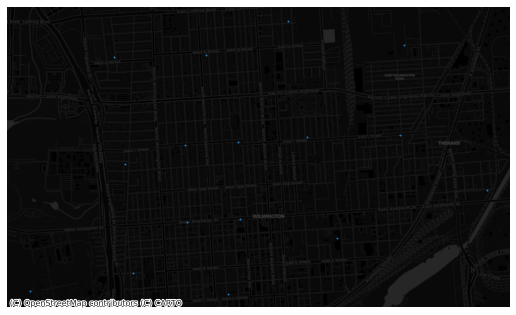

In [309]:
# table of wilmington
display(PM25[PM25.neighborhood == 'Wilmington'].head()) 

# map of wilmington
ax = PM25[PM25.neighborhood == 'Wilmington'].plot(figsize=(9,9), markersize=1)

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

In [310]:
# creating a function based on neighborhood
def area_by(neighborhood='Wilmington'):
    # table
    display(PM25[PM25.neighborhood == neighborhood].head()) 
    
    # ma
    ax = PM25[PM25.neighborhood == neighborhood].plot(figsize=(9,9), markersize=2)
    
    # axis
    ax.axis('off')
    
    # basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

,censustract,latinx,white,black,ami,asian,hpi,other,geoid,tract,neighborhood,location,longitude,latitude,asthma,geometry,x,y
950,06037294110,3571,267,53,8,137,89,3,1400000US06037294110,"Census Tract 2941.10, Los Angeles County, Cali...",Wilmington,"(33.797961, -118.2592835)",-118.260391,33.797993,53.39,POINT (-13164686.507 4001709.594),-1.316469e+07,4.001710e+06
951,06037294120,2173,33,129,4,10,8,2,1400000US06037294120,"Census Tract 2941.20, Los Angeles County, Cali...",Wilmington,"(33.795656, -118.2471535)",-118.247576,33.795780,70.22,POINT (-13163259.981 4001413.082),-1.316326e+07,4.001413e+06
952,06037294200,4344,320,49,21,143,38,26,1400000US06037294200,"Census Tract 2942, Los Angeles County, California",Wilmington,"(33.794846, -118.269301)",-118.269389,33.794838,66.68,POINT (-13165688.182 4001286.898),-1.316569e+07,4.001287e+06
953,06037294301,1999,219,37,6,145,35,4,1400000US06037294301,"Census Tract 2943.01, Los Angeles County, Cali...",Wilmington,"(33.794497, -118.2807785)",-118.279553,33.794662,63.92,POINT (-13166819.567 4001263.335),-1.316682e+07,4.001263e+06
954,06037294302,4178,287,92,15,134,35,3,1400000US06037294302,"Census Tract 2943.02, Los Angeles County, Cali...",Wilmington,"(33.7848645, -118.2793115)",-118.278290,33.784876,70.22,POINT (-13166679.037 3999952.630),-1.316668e+07,3.999953e+06


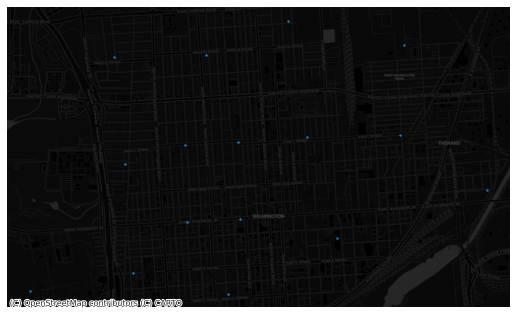

In [311]:
area_by(neighborhood = 'Wilmington')

In [312]:
# making our function incteractive
@interact

# function argument will become interactive
#also added asthma percentiles
def area_by(neighborhood = PM25.neighborhood.unique().tolist(),
            asthma=top_asthma):
    # table
    display(PM25[(PM25.neighborhood == neighborhood)].head()) 

    # map
    ax = PM25[PM25.neighborhood == neighborhood].plot(figsize=(9,9), markersize=10)
    
    # axis
    ax.axis('off')

    # basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

interactive(children=(Dropdown(description='neighborhood', options=('Tujunga', 'Shadow Hills', 'Sun Valley', '…

In [299]:
# Web Mercator
PM25 = PM25.to_crs('EPSG:3857')

In [300]:
# creating an x and y column to find our mean and median centers
PM25['x'] = PM25.geometry.x
PM25['y'] = PM25.geometry.y

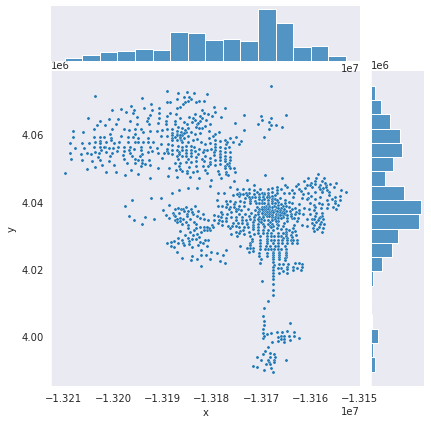

In [301]:
#creating a plot to see where most of our data lies
g = sns.jointplot(data = PM25,
                  x='x', 
                  y='y',
                  s=10)

In [302]:
# compute the mean and median centers
mean_center = centrography.mean_center(PM25[['x','y']])
med_center = centrography.euclidean_median(PM25[['x','y']])

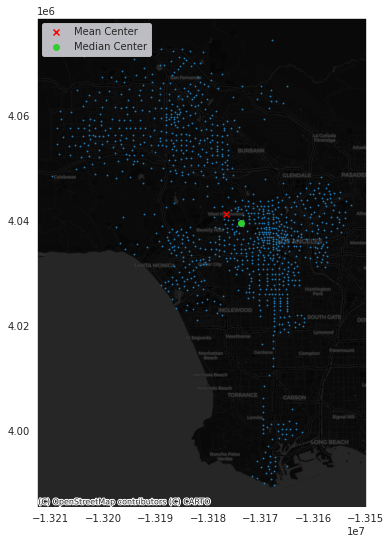

In [303]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(PM25['x'], PM25['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

ax.legend()

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)
# Display
plt.show()

In [304]:
#now we will add a std ellipse
major, minor, rotation = centrography.ellipse(PM25[['x','y']])

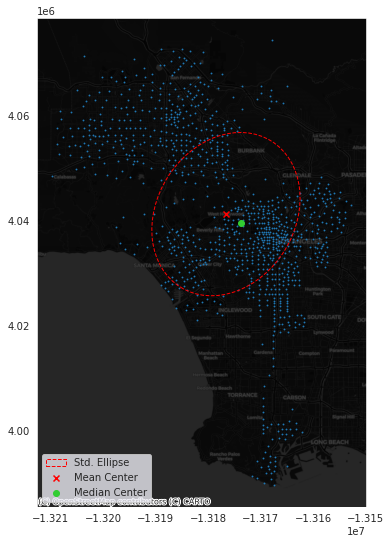

In [305]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(PM25['x'], PM25['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

# Display
plt.show()

In [306]:
#conclusions:
    #for this assignment, I looked at asthma rates
    #while our interactive map my have some issues (possibly due to being numerical data), it does show that some neighborhoods have greater asthma rates than others 
    #based on our joint plot,asthma rates are greater in the east of LA and central LA as well
    #we also found that the mean center is around the West Hollywood area which is also close to where the median center is 
    #based on the std ellipse, there seems to be more tendancy for asthma in the central, west, and northern areas of LA. we will further investigate this

In [ ]:
#contributions
    #Sarah worked on the healthy places index dataset that looks at green spaces access and tree canopy coverage
    #I looked at the calenvirosccreen dataset that looks at particulate matter and asthma